# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Yuanita TriHastutik Rachmawati]
- **Email:** [yuanitatri987@gmail.com]
- **ID Dicoding:** [yuanita_9dre]

## Menentukan Pertanyaan Bisnis

1. Day Review : Kapan terjadinya pelonjakan paling tinggi di tahun 2011 dan bagaimana kecenderungan waktu peminjaman oleh pengguna ?
2. Apakah terdapat perbedaan pelonjakan yang terjadi di tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

Penggunaan library yang didukung oleh python,
- pandas untuk membaca dataset yang berupa dataset yang bertype csv
- numpy untuk perhitungan matematika

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
dt_day= pd.read_csv('data/day.csv') #untuk data peminjaman sepeda
dt_day

Memuat data peminjaman sepeda berdasarkan parameter yang sudah disediakan. terdapat 730 data dan 16 kolom parameter

In [66]:
# Load data menurut jam
dt_hour= pd.read_csv('data/hour.csv') #untuk data peminjaman sepeda
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
Memuat data peminjaman sepeda berdasarkan setiap jam. terdapat 17378 row dan 17 kolom parameer.
1. instant: indeks peminjaman
2.dteday : tanggal peminjaman
3. season : musim (1,2,3)
4. yr : tahun (2011,2012)
5. mnth : bulan
7. holiday : hari libur (1), hari kerja (0)
8. weekday : hari kerja
9. workingday : hari kerja(1), hari libur (0)
10. weatherist : cuaca
11. temp : Suhu yang dinormalkan dalam Celcius. Nilainya diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)
12. atemp :
13. hum :  Kelembaban yang dinormalkan. Nilai dibagi menjadi 100 (maks)
14. windspeed: Kecepatan angin yang dinormalkan. Nilai dibagi menjadi 67 (maks)
15. casual: jumlah pengguna kasual
16. registered : jumlah pengguna terdaftar
17. count :jumlah pengguna keseluruhan

// Pada data hari memang tidak tidak ada kolom hr, karena rekap data sesuai harian.

### Assessing Data

In [ ]:
dt_day.info()

In [ ]:
dt_day.isnull().sum()

In [ ]:
print("Jumlah duplikasi: ",dt_day.duplicated().sum())
dt_day.describe()

Setelah dilakukan penilaian tidak terdapat missing value pada data hari, namun type data pada kolom dteday yang seharusnya bertype data datetime namun disini bertype data object, karena dateday merupakan data tanggal seperti tahun-bulan-tanggal

In [83]:
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
dt_hour.isna().sum()

In [ ]:
print("Jumlah duplikasi: ",dt_hour.duplicated().sum())
dt_hour.describe()

In [ ]:
import matplotlib.pyplot as plt
Q1 = (dt_day['cnt']).quantile(0.25)
Q3 = (dt_day['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Batas bawah:", minimum)
print("Batas atas:", maximum)

outliers = dt_day[(dt_day['cnt'] > maximum) | (dt_day['cnt'] < minimum)]
print("Outlier:", outliers)

plt.boxplot(dt_day['cnt'])
plt.title("Boxplot dt_day")
plt.show()

- Saya menggunakan nilai kuartil untuk mengetahui batas atas dan bawah dari jumlah peminjam(cnt) pada data day. kemudian variabel outliers menyimpan nilai dari kolom cnt yang melebihi batas maximum dan minimum.

In [86]:
# # import matplotlib.pyplot as plt
Q1 = dt_hour['cnt'].quantile(0.25)
Q3 = dt_hour['cnt'].quantile(0.75)


IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
print(maximum,minimum)

# p1 = dt_hour[dt_hour['cnt'] < minimum]
# p2= dt_hour[dt_hour['cnt'] > maximum]


outliers = dt_hour.loc[(dt_hour['cnt'] < maximum) & (dt_hour['cnt'] > minimum)]
print("Outlier:", len(outliers))
print("all:", len(dt_hour))
print(" after:", len(outliers)-len(dt_hour))

# outliers

# print("Q1:", Q1)
# print("Q3:", Q3)
# print("IQR:", IQR)
# print("Batas bawah:", minimum)
# print("Batas atas:", maximum)


# plt.boxplot(dt_hour['cnt'])
# plt.title("Boxplot untuk Identifikasi Outlier dt_hours")
# plt.show()



642.5 -321.5
Outlier: 16874
all: 17379
 after: -505


**Insight:**
- Dalam rekap data hari tidak ditemukan missing valaue, dicek melalui dt_day.info(),terdapat 15 kolom dan 731 row, 16 type data.
- Dalam rekap data peminjaman per-jam tidak ditemukan juga missing value,dicek melalui dt_hour.info() terdapat 16 kolom dengan 17379 row, 17 type data.
- Namun terdapat kesalahan typedata dimana dteday seharusnya bertipe data datetime buka sebagai object, karena object diguanakan untuk string
- Pada data_hour terdapat 505 nilai dari kolom cnt yang termasuk dalam outlier. Oleh karena itu harus dilakukan clean data pada data outlier

### Cleaning Data

Cleaning data dilakukan apabila terdapat data yang tidak akurat,missing value, pada dataset ini tidak terdapat missing value ataupun data yang duplikat. Namun saya mengubah type "object" dari kolom dteday ke type data datetime. Kemudian hal yang sama juga saya lakukan pada data_hour, karena terdapat kesalah type data pada dteday peminjaman. Saya juga melakukan clean data pada dt_hours untuk mendrop 505 data yang ditemukan outlier

1. Define : dt_day memiliki parameter instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt. Dengan target yang akan saya  analisis adalah mencari tahu penyebab minat peminjam sepeda sesuai dengan kategori hari/tahun. Karena terdapat kesalahan type data maka akan dilakukan perubahan type data terlebih dahulu.
2. Code : Eksekusi program
3. Test : Menjalankan kode program

In [ ]:
dt_day["dteday"] = pd.to_datetime(dt_day['dteday'], format='%Y-%m-%d')
dt_day.info()

In [ ]:
dt_hour["dteday"] = pd.to_datetime(dt_hour['dteday'], format='%Y-%m-%d')
dt_hour.info()

In [ ]:
dt_day['yr'] = dt_day['yr'].replace({0:2011, 1: 2012})
dt_day

In [ ]:
dt_hour['yr'] = dt_hour['yr'].replace({0:2011, 1: 2012})
dt_hour

Outlier: 505


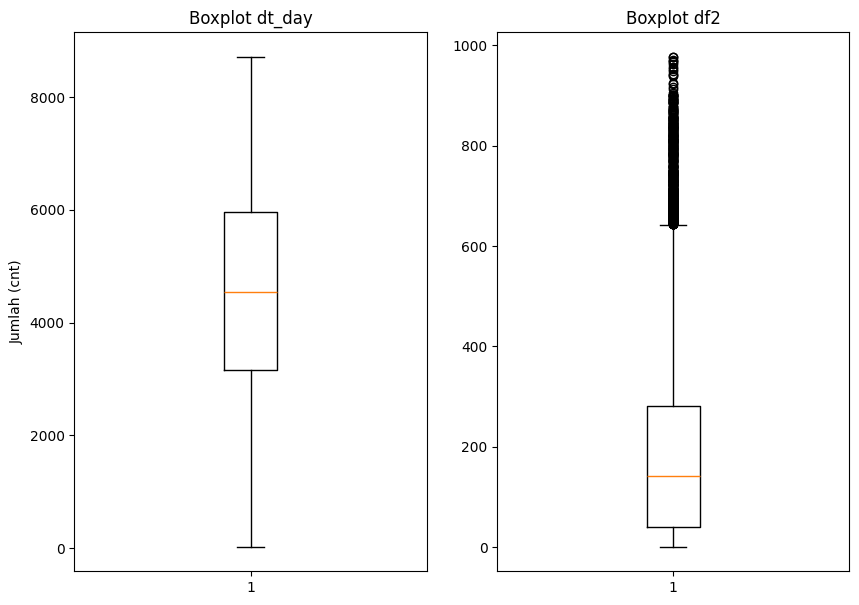

In [35]:

df2 = dt_hour.mask(cond=p1, other=minimum, axis=0)
df2

outliers = df2[(df2['cnt'] > maximum) | (df2['cnt'] < minimum)].shape[0]
print("Outlier:", outliers)

fig, axs = plt.subplots(1, 2, figsize=(10, 7))
axs[0].boxplot(dt_day['cnt'])
axs[0].set_title('Boxplot dt_day')
axs[0].set_ylabel('Jumlah (cnt)')
axs[0].set_xlabel('')

axs[1].boxplot(df2['cnt'])
axs[1].set_title('Boxplot df2')
plt.show()

**Insight:**
- Perubahan dilakukan pada kedua data memanfaatkan method dari library pandas yaitu pd.to_datetime dengan format year-month-day.
- Pada saat dicek kembali menggunakan dt_hour.info() dteday sudah berganti typedata dengan datetime64[ns]
- Saya melakukan cleaning data untuk data outliers pada kolom cnt, menggunakan method maks, yang dimana nilai yang outlier aakn diganti dengan nilai maksimum

## Exploratory Data Analysis (EDA)

### Explore ...

Explorasi saya lakukan dengan melakukan beberapa penggabungan data dari dataset yang tesedia, melakukan groupby dengan target yang sudah ditentukan

In [ ]:
dt_day.describe(include="all")

In [ ]:
dt_day.groupby(by="weathersit").agg({
    "instant" : "nunique",
    "registered" :["max", "min", "mean", "std"]
})

In [ ]:
dt_day.groupby(by="workingday").agg({"registered" :["max", "min", "mean", "std"]})

In [ ]:
dt_day.groupby(by="season").instant.nunique().sort_values(ascending=True)

In [ ]:
dt_day.groupby(by="yr").casual.nunique().sort_values(ascending=False)

Dari pivot table diatas, pengelompokan data peminjaman sepeda berdasarkan musim. Melalui daftar pelanggan yang sudah register pada musim pertama(cuaca cerah) sebanyak 6946 dan paling sedikit 416, pada musim kedua sebanyak 6844 dan paling sedikit 491, pada musim ketiga terdapat penurunan 4324 dan paling sedikit 20 peminjam.

**Insight:**
- Perubahan saya lakukan pada dt_day mengganti kategori taun 2011=0, 2012=1 menggunakan method replace

## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Kapan dan pada jam berapa peminjaman sepeda melonjak tinggi pada tahun 2011??


**DATASET = DT_DAY**

In [ ]:
by_2011 = dt_day[dt_day['yr'] == 2011]
hasil=by_2011.groupby(by="dteday")['cnt'].sum()
sorted_hasil = hasil.sort_values(ascending=False)
sorted_hasil #dihasilkan pada tanggal 2011-07-04 dengan jumlah 6043


In [21]:
result = '2011-07-04'
result2 =dt_day[dt_day['dteday']==result]
result2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,185,2011-07-04,3,2011,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043


**PENJELASAN**

Variabel by_2011 menyimpan data khusus untuk 2011. data tersebut digroup dengan kolom count yang disimpan dalam variabel hasil. Setelah data menjadi group kemudian di Descanding agar mengetahui mana data yang memiliki nilai max. data max tahun 2011 tercatat pada 2011-07-04 dengan jumlah 6043 data. Data yang didapat pada tanggal tesebut mencoba dikelompokan dengan dteday karena data pada tanggal tersebut masih terpencar. Kemudian terdapat variabel result untuk menyimpan data tanggal yang akan dilihat datanya yaitu 2011-07-04. Variabel result2 digunakan untuk mengambil data yang sama dari kolom dteday sesuai dengan result.


**DATASET = DT_HOURS**

In [ ]:
by_2011 = dt_hour[dt_hour['yr'] == 2011]
hasil=by_2011.groupby(by="dteday")['cnt'].sum()
hasil

In [ ]:
result = '2011-07-04'
result2 =dt_hour[dt_hour['dteday']==result]
result2



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
colors=['#72BCD4']
sns.barplot(
    x='hr',
    y='cnt',
    data=result2, palette=colors)
plt.title('Peminjaman Sepeda pada 2011-07-04 berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylim(0,500)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=14)
plt.show()



### Pertanyaan 2:

2. Apakah terdapat perbedaan pelonjakan yang terjadi di tahun 2011 dan 2012?

In [ ]:
dt_day['yr'] = dt_day['yr'].replace({0:2011, 1: 2012})

In [ ]:
group_df = dt_day.groupby('yr')['cnt'].sum().reset_index()
group_df

,yr,cnt
0,2011,1243103
1,2012,2049576


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=group_df, x='yr', y='cnt', hue='yr', palette='Set1')
plt.title('Perbandingan Peminjaman Sepeda antara Tahun 2011 dan 2012', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=14)
plt.legend(title='Tahun')
plt.show


**Insight:**
- Pertanyaan 1 : Dari analisis dataset dt_day dan dt_hour, didapatkan peminjaman sepeda mengalami pelonjakan paling tinggi pada 2011-07-04 dengan jumlah peminjam yaitu 6034 data yang terdiri dari 2 kategori peminjam yaitu register dan casual. Dalam 23 Jam peminjaman paling tinggi terjadi pada jam 21 dengan jumlah 457 peminjam. Visualisasi data menggunakan barplot dengan sumbu x adalah Waktu: Jam, dan sumbu y:jumlah peminjam

- Pertanyaan 2: Perbedaan pelonjakan peminjam sepeda pada tahun 2011 dan 2012 sangat signifikan pada 2011 jumlah data peminjam 1243103, dan 2012 mengalami pelonjakan yaitu 2049576 data peminjam.

In [27]:
all_data = pd.concat([dt_day, dt_hour], ignore_index=True)
all_data.to_csv("all_data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari analisis data untuk menjawab pertanya pertama dapa disimpulkan terdapat kuantitas paling tinggi peminjaman sepeda pada jam dan hari hari tertent. Dari seluruh data di tahun 2011 terdapat 1 hari dimana kuantitas peminjam adalah paling tinggi yaitu 2011-07-04 dengan jumlah peminjam yaitu 457 orang dan peeminjaman paling tinggi terjadi pada jam 21.  Terdapat berbagai parameter yang bisa saya analisis, seperti tanggal,bulan,tahun,musim, ketegori peminjam termasuk dalam casual atau register.
- Analisis data kedua  untuk mengetahui perbandingan kuantitas peminjam di tahun 2011 dan 2012. Pada tahun 2012 peminjam mencapai 2049576 lebih banyak dari 2011, karena pada 2011 peminjam hanya 1243103.  Perbedaan mencapai 806.473 orang.